# 2 Gradient Descent for Regression
You have to use Dataset-2 for this experiment. Dataset-2 consists of train, validation, and
test files. The input is a real valued scalar and the output is also a real valued scalar.

# 2.2 Try different step sizes and choose the best step size by using validation data. Report
the test MSE of the chosen model.

In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [3]:
def getdata(filename):
    import csv
    import numpy as np
    with open (filename,'r') as csvfile:
        Dataset_1_test = csv.reader(csvfile)   
        X = []
        Y = []
        for row in Dataset_1_test:
            x = row[0]
            y = row[1]
            X.append(x)
            Y.append(y)   
        
    X = np.array(X).astype(np.float32)
    Y = np.array(Y).astype(np.float32)
    # convert rank 1 array to rank 2 array
    X = np.reshape(X, (-1, 1))
    Y = np.reshape(Y, (-1, 1))
    return X , Y

In [4]:
X_train, Y_train = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_2_train.csv")
print(X_train.shape)
print(Y_train.shape)

X_valid, Y_valid = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_2_valid.csv")
print(X_valid.shape)
print(Y_valid.shape)

(300, 1)
(300, 1)
(100, 1)
(100, 1)


# computer Xm matrix that contains polynomial terms of X

In [5]:
def getfeaturematrix (X,polynomial):
    Xm = []
    for i in range(0,polynomial+1):
        a = np.power(X,i)
        Xm.append(a)
    Xm = np.array(Xm)
    Xm = np.squeeze(Xm, axis=(2,)).T
    return Xm

In [6]:
Xm_train = getfeaturematrix (X_train,1)
feature_no = Xm_train.shape[1]
count_example = Xm_train.shape[0]
print(Xm_train.shape)

Xm_valid = getfeaturematrix (X_valid,1)
print(Xm_valid.shape)

(300, 2)
(100, 2)


# W Computation function

In [7]:
def computeW (learning_rate,Xm,A,W):
    # A = (Hypothesis-Y)
    W = W - learning_rate*(       (A*np.reshape(Xm, (-1, 1)))        )
    return W

In [8]:
def computecost(Hypothesis,Y):
    J = (1/2)*np.mean((Hypothesis-Y)**2) 
    return J

In [9]:
def computeMSE (Hypothesis,Y):
    MSE = np.mean((Hypothesis-Y)**2) 
    return MSE

In [10]:
#W = np.random.randn(feature_no,1)
#W

In [11]:
#learning_rate = 1e-06

In [12]:
#hypothesis = np.dot(W.T,Xm_train[0])
#A = (hypothesis - Y_train[0])
#W = computeW (learning_rate,Xm_train[0],A,W)

In [13]:
def computeEPOCH (count_example,Xm_train,learning_rate,W):
    for i in range(0,count_example):
        hypothesis = np.dot(W.T,Xm_train[i])
        A = (hypothesis - Y_train[i])
        W = computeW (learning_rate,Xm_train[i],A,W)
    
    Hypothesis = np.dot(Xm_train,W)
    J = computecost(Hypothesis,Y_train)
    return J, W
    


In [14]:
W = np.random.randn(feature_no,1)

In [15]:
MSE_traindata = []
MSE_validdata = []
W_matrix = []


for j in range (1,11 ):
    
    W_learn = W
    
    learning_rate = 1/ ( (10)**j )
    #print(learning_rate)
    
    for i in range (0,100):
    
    
        J , W_learn = computeEPOCH (count_example,Xm_train,learning_rate,W_learn)

    W_matrix.append(W_learn)
    
    Hypothesis_train = np.dot(Xm_train,W_learn)
    Hypothesis_valid = np.dot(Xm_valid,W_learn)
    
    
    MSE_traindata = np.append ( MSE_traindata, computeMSE (Hypothesis_train,Y_train) )
    MSE_validdata = np.append ( MSE_validdata, computeMSE (Hypothesis_valid,Y_valid) )

In [16]:
MSE_traindata

array([ 0.11482622,  0.09577241,  0.09562953,  0.12876013,  5.14483173,
       12.35840565, 13.49957455, 13.61940007, 13.63144161, 13.63264635])

In [63]:
for j in range (1,11 ):
    learning_rate = 1/ ( (10)**j )
    print(learning_rate)

0.1
0.01
0.001
0.0001
1e-05
1e-06
1e-07
1e-08
1e-09
1e-10


array(1.e-10)

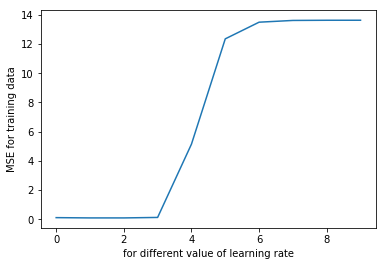

In [43]:
plt.plot(MSE_traindata)
plt.xlabel("for different value of learning rate")
plt.ylabel("MSE for training data")
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#2#1.png')

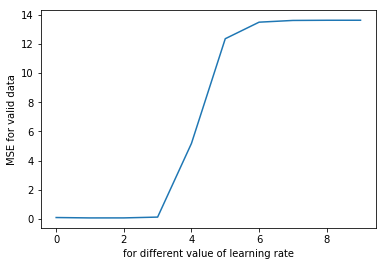

In [44]:
plt.plot(MSE_validdata)
plt.xlabel("for different value of learning rate")
plt.ylabel("MSE for valid data")
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#2#2.png')

In [20]:
MSE_validdata

array([ 0.10027225,  0.07385792,  0.07495982,  0.1296548 ,  5.17335255,
       12.34555875, 13.47872652, 13.59769716, 13.60965265, 13.61084878])

### As we see for learning rate/ step size = 0.001 we get the least MSE in both training and validation, it's the best learning step

### Reporting the test MSE for test set, where we use the W, that we got for learning rate = 0.001

In [21]:
X_test, Y_test = getdata("F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/hwk1_datasets/Datasets/Dataset_2_test.csv")
print(X_test.shape)
print(Y_test.shape)

(100, 1)
(100, 1)


In [22]:
Xm_test = getfeaturematrix (X_test,1)
print(Xm_test.shape)

(100, 2)


In [23]:
W_learn = W_matrix[3]  # chose lambda = 0.001
Hypothesis_test = np.dot(Xm_test,W_learn)
MSE_testdata = computeMSE (Hypothesis_test,Y_test) 

In [24]:
MSE_testdata

0.09820181276743561

# 2.3 Visualize the fit for every epoch and report 5 visualizations which shows how the regression fit evolves during the training process.

In [34]:
W_learn_vis = W

J_matrix = []
W_matrix_vis = []

MSE_testdata_vis= []
Hypothesis_test = []

learning_rate = 0.0001

for i in range (0,100):

    J , W_learn_vis = computeEPOCH (count_example,Xm_train,learning_rate,W_learn_vis)
    
    W_matrix_vis.append(W_learn_vis)

    
    Hypothesis_test.append ( np.dot(Xm_test,W_learn_vis) )
    
    #print( computeMSE (Hypothesis_train,Y_train) )
    
    MSE_testdata_vis = np.append ( MSE_testdata_vis, computeMSE (Hypothesis_test,Y_test) )

# MSE for every epoch to get the intuition of the quality of the fit

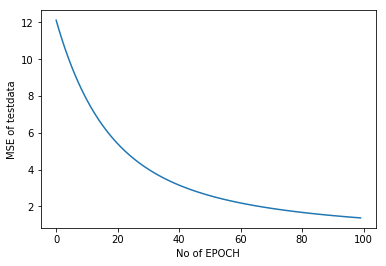

In [67]:

plt.plot(MSE_testdata_vis)

plt.ylabel('MSE of testdata')
plt.xlabel('No of EPOCH')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#3#7.png')

# 5 graph to visualize how regression fit evolves

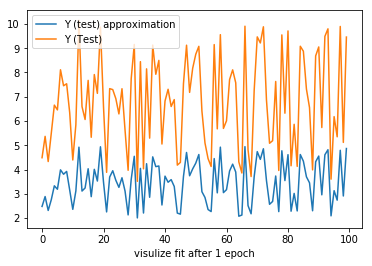

In [52]:
plt.plot(Hypothesis_test[0])
plt.plot(Y_test)
plt.legend(['Y (test) approximation','Y (Test)'])
plt.xlabel('visulize fit after 1 epoch')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#3#1.png')

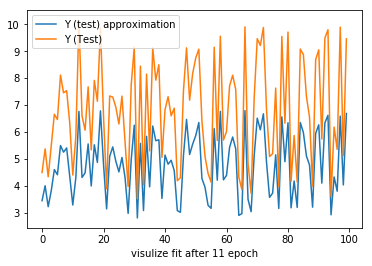

In [53]:
plt.plot(Hypothesis_test[10])
plt.plot(Y_test)
plt.legend(['Y (test) approximation','Y (Test)'])
plt.xlabel('visulize fit after 11 epoch')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#3#2.png')

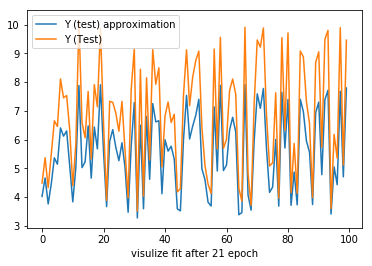

In [54]:
plt.plot(Hypothesis_test[20])
plt.plot(Y_test)
plt.legend(['Y (test) approximation','Y (Test)'])
plt.xlabel('visulize fit after 21 epoch')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#3#3.png')

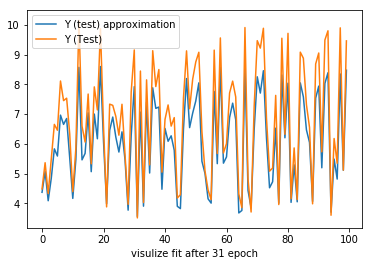

In [56]:
plt.plot(Hypothesis_test[30])
plt.plot(Y_test)
plt.legend(['Y (test) approximation','Y (Test)'])
plt.xlabel('visulize fit after 31 epoch')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#3#4.png')

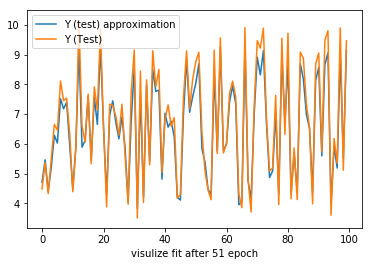

In [55]:
plt.plot(Hypothesis_test[50])
plt.plot(Y_test)
plt.legend(['Y (test) approximation','Y (Test)'])
plt.xlabel('visulize fit after 51 epoch')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#3#5.png')

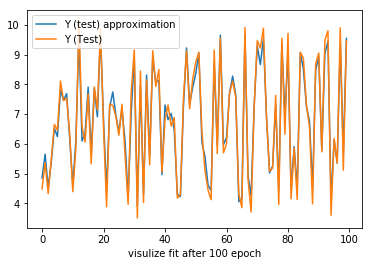

In [57]:
plt.plot(Hypothesis_test[99])
plt.plot(Y_test)
plt.legend(['Y (test) approximation','Y (Test)'])
plt.xlabel('visulize fit after 100 epoch')
plt.savefig('F:/Winter 2018/Applied ML/winter 2018/Assignments/assignment 1/fig2#3#6.png')